In [2]:
import requests
from bs4 import BeautifulSoup
from matplotlib import pyplot as plt
from collections import Counter
import pandas as pd

ZADANIE 1

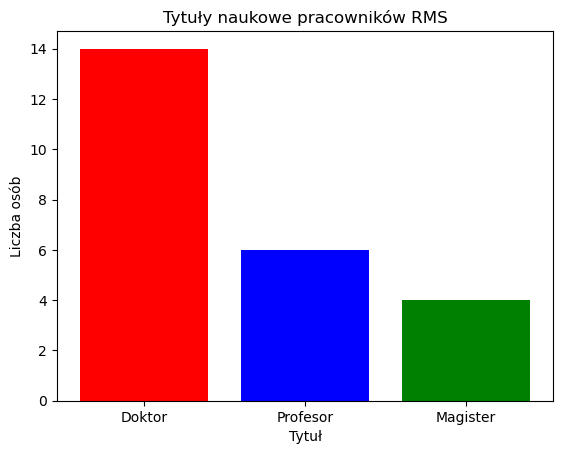

In [3]:
def zad1():
    url = "https://ms.polsl.pl/kmmti/pracownicy/"
    response = requests.get(url)
    soup = BeautifulSoup(response.content, "html.parser")

    pracownicy = []
    for tag in soup.find_all("a"):
        tekst = tag.get_text().strip()
        if any(x in tekst.lower() for x in ["prof.", "dr ", "mgr"]):
            pracownicy.append(tekst)

    stopnie = []
    for p in pracownicy:
        if 'prof.' in p.lower():
            stopnie.append('Profesor')
        elif 'dr' in p.lower():
            stopnie.append('Doktor')
        elif 'mgr' in p.lower():
            stopnie.append('Magister')

        licnzik = Counter(stopnie)

    plt.bar(licnzik.keys(), licnzik.values(), color=['red', 'blue', 'green'])
    plt.title("Tytuły naukowe pracowników RMS")
    plt.xlabel("Tytuł")
    plt.ylabel("Liczba osób")
    plt.show()

zad1()

ZADANIE 2

Najdrozsza: Liczba Π oraz jej kreatywna obecność w historii matematyki., 91.35 zł
Najtańsza: Elementy teorii katastrof w zadaniach, 7.35 zł

Książki Grzymkowski R.
                                                title  price
0       Wybrane metody obliczeniowe równań całkowych.  16.80
3   Przewodnik do wykładów i ćwiczeń z analizy mat...  15.75
13  Przekształcenie Taylora i jego realizacja w pa...  30.45
20  Matematyka. Zadania, odpowiedzi i ich realizac...  24.15



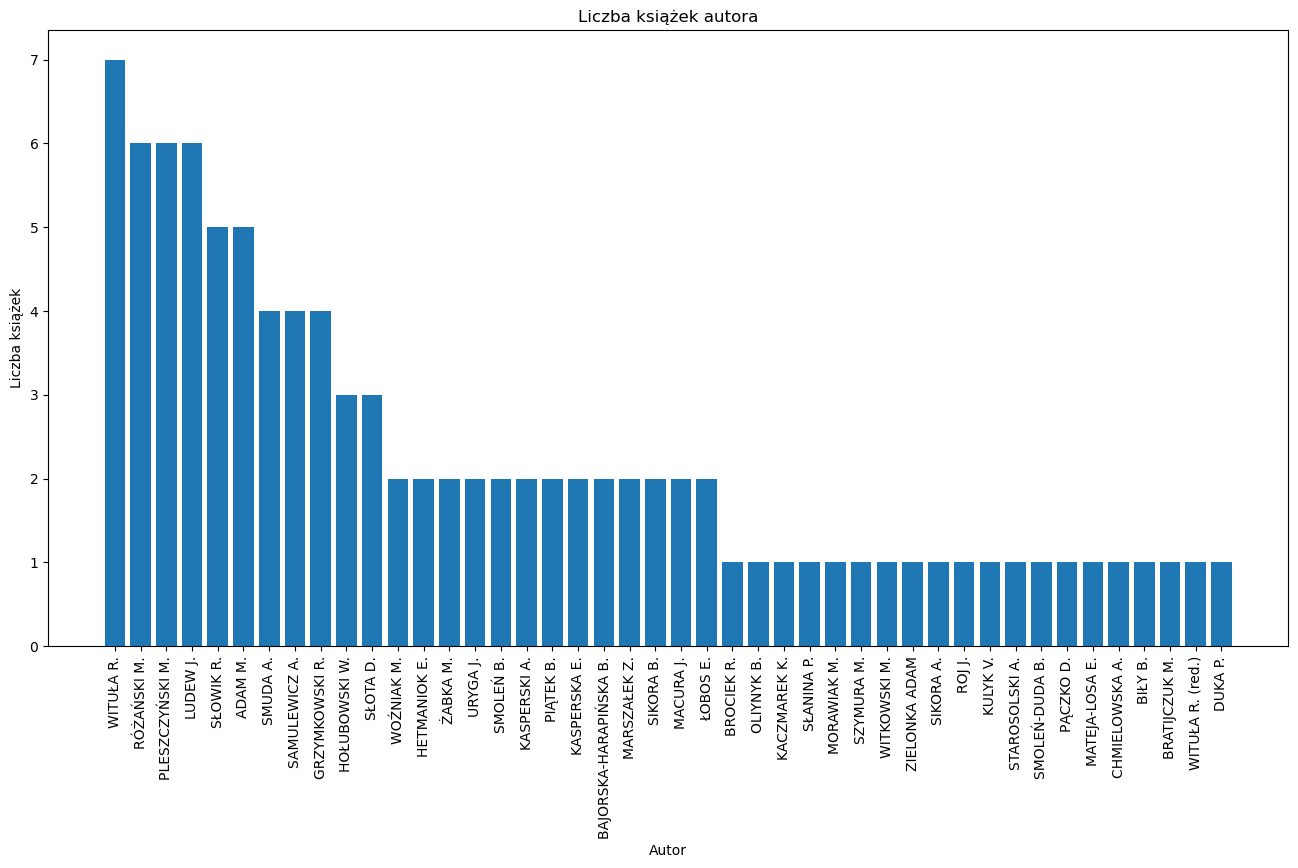

In [6]:
def zad2():
    base_url = "https://wydawnictwopolitechniki.pl/;s,wyniki,dp,22,kat,22,tryb,normal,zacz,{}"
    books = []
    page = 1
    while True:
        url = base_url.format(page)
        r = requests.get(url)
        if r.status_code != 200:
            break
        s = BeautifulSoup(r.text, "html.parser")
        titles = s.find_all("h1", class_="tytul + tytul_normal")
        authors = s.find_all("div", class_="autor + autor_normal")
        price = s.find_all("div", class_="mybook_cenabox + mybook_cenabox_normal")

        if not titles:
            break

        for t, a, p in zip(titles, authors, price):
            title = t.get_text().strip()
            authors = [x.strip() for x in a.get_text().strip().replace("Autor:", "").split(",")]
            price_text = p.get_text().strip().replace("zł", "").replace(",", ".")
            price = float(price_text)

            books.append({
                "title": title,
                "author": authors,
                "price": price
            })
        page += 1

    df = pd.DataFrame(books)
    cheapest = df.loc[df['price'].idxmin()]
    most_expensive = df.loc[df['price'].idxmax()]
    print(f"Najdrozsza: {most_expensive['title']}, {most_expensive['price']} zł")
    print(f"Najtańsza: {cheapest['title']}, {cheapest['price']} zł")
    print()

    maska = df['author'].apply(lambda x: any("GRZYMKOWSKI R." in a for a in x))
    print("Książki Grzymkowski R.")
    print(df[maska][['title', 'price']])
    print()

    all_authors = []
    for auts in df["author"]:
        all_authors.extend(auts)

    author_counts = pd.Series(all_authors).value_counts()

    plt.figure(figsize = (16, 8))
    plt.bar(author_counts.index, author_counts)
    plt.xticks(rotation=90)
    plt.title("Liczba książek autora")
    plt.xlabel("Autor")
    plt.ylabel("Liczba książek")
    plt.show()

zad2()

ZADANIE 3

In [114]:
def zad3():
    url = "https://www.polsl.pl/wydarzenia/4492/"
    response = requests.get(url)
    soup = BeautifulSoup(response.text, "html.parser")

    events_by_year = {}

    for event in soup.find_all("div", class_="mn-list-view"):
        title_tag = event.find("p")
        link_tag = event.find("a", class_="mn-read-more")
        date_tag = event.find("div", class_="mn-list-view-pub-date")

        title = title_tag.get_text(strip=True)
        link = link_tag["href"]
        date_text = date_tag.get_text()

        year = date_text.strip().split(":")[1].split("-")[0]

        if year not in events_by_year:
            events_by_year[year] = []
        events_by_year[year].append((title, link))

    with open("wydarzenia.html", "w", encoding="utf-8") as f:
        f.write("<html><body>\n")
        for year in sorted(events_by_year.keys(), reverse=True):
            f.write(f"<h1>Rok {year}</h1>\n")
            for title, link in events_by_year[year]:
                f.write(f'<p>{title} <a href="{link}">Zobacz więcej</a></p>\n')
        f.write("</body></html>")
zad3()